In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster


In [2]:
parks = gpd.read_file('../data/metroparksandboundaries.geojson')  
print(parks.crs)
parks.head()

epsg:4326


acres                  name year_estab     common_nam status  \
0     69.86    Harpeth River Park       1988  Harpeth River   PARK   
1      9.88    Harpeth Knoll Park       1972  Harpeth Knoll   PARK   
2     17.14         Bellevue Park       1982    Red Caboose   PARK   
3    809.59       Bells Bend Park       2007     Bells Bend   PARK   
4  2168.792  Alvin G. Beaman Park       1996         Beaman   PARK   

                   address           lon          lat  \
0      7820 Coley Davis Rd   -86.9592214  36.07738249   
1  708 Goodpasture Terrace  -86.93815537  36.05942777   
2     656 Colice Jeanne Rd  -86.93354496  36.07159731   
3    4187 Old Hickory Blvd  -86.92646294  36.15016925   
4   5911 Old Hickory Blvd.  -86.91984207  36.26075833   

                                          descriptio  \
0  Harpeth River State Park has much historical a...   
1  Huge grassy field with playground, and shade s...   
2  Bellevue Park, known as Red Caboose Park, is p...   
3  Located in western Davidson County, this park ...   
4  Beaman Park provides education and awareness p...   

                                            geometry  
0  MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ...  
1  MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ...  
2  MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ...  
3  MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ...  
4  MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ...

In [3]:
parks.crs = "EPSG:4326"
print(parks.crs)

EPSG:4326


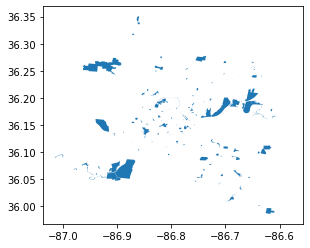

In [4]:
parks.plot();

/opt/anaconda3/envs/geo/lib/python3.7/site-packages/geopandas/plotting.py:509: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


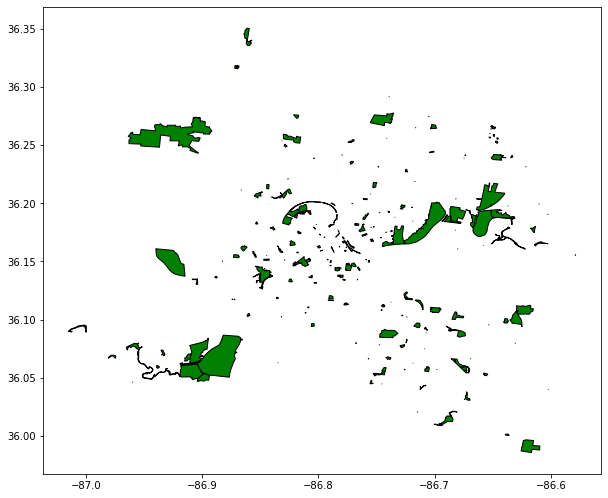

In [5]:
leg_kwds = {'title': 'parks', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

parks.plot(column = 'name', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              #cmap = 'Greens_r')
              color = 'Green')
plt.show() 

#cmaps['Sequential'] = [
#            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

In [6]:
water_fountains = pd.read_csv('../data/waterfountains_cleaned.csv')
print(water_fountains.shape)
water_fountains.head(3)

(73, 4)


the_geom        lat  \
0  POINT (-86.89425345576078 36.26250455840148) -86.894253   
1  POINT (-86.90622747033689 36.06089914863129) -86.906227   
2  POINT (-86.86727565917963 36.08310102493863) -86.867276   

                                   fountain_name        lon  
0                          Beaman Water Fountain  36.262505  
1             Edwin Nature Center Water Fountain  36.060899  
2  Percy Warner Belle Meade Gates Water Fountain  36.083101

In [7]:
water_fountains['geometry'] = water_fountains.apply(lambda x: Point((float(x.lat), 
                                                         float(x.lon))), 
                                        axis=1)
water_fountains.head(3)

the_geom        lat  \
0  POINT (-86.89425345576078 36.26250455840148) -86.894253   
1  POINT (-86.90622747033689 36.06089914863129) -86.906227   
2  POINT (-86.86727565917963 36.08310102493863) -86.867276   

                                   fountain_name        lon  \
0                          Beaman Water Fountain  36.262505   
1             Edwin Nature Center Water Fountain  36.060899   
2  Percy Warner Belle Meade Gates Water Fountain  36.083101   

                           geometry  
0  POINT (-86.89425346 36.26250456)  
1  POINT (-86.90622747 36.06089915)  
2  POINT (-86.86727566 36.08310102)

In [8]:
parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
waterfountain_location = gpd.GeoDataFrame(water_fountains, 
                           crs = parks.crs, 
                           geometry = water_fountains['geometry'])

In [10]:
parks = parks[['name', 'lon', 'lat', 'geometry']]


In [34]:
loc_waterfountains_by_park = gpd.sjoin(parks, waterfountain_location, op = 'intersects')

In [35]:
loc_waterfountains_by_park.head()

name      lon_left     lat_left  \
2         Bellevue Park  -86.93354496  36.07159731   
3       Bells Bend Park  -86.92646294  36.15016925   
4  Alvin G. Beaman Park  -86.91984207  36.26075833   
5     Edwin Warner Park   -86.9074396  36.05688279   
5     Edwin Warner Park   -86.9074396  36.05688279   

                                            geometry  index_right  \
2  MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ...           47   
3  MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ...           22   
4  MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ...            0   
5  MULTIPOLYGON (((-86.89420 36.04865, -86.89429 ...            1   
5  MULTIPOLYGON (((-86.89420 36.04865, -86.89429 ...           29   

                                        the_geom  lat_right  \
2   POINT (-86.93480988838863 36.07298516423679) -86.934810   
3  POINT (-86.92179182147396 36.154195748354134) -86.921792   
4   POINT (-86.89425345576078 36.26250455840148) -86.894253   
5   POINT (-86.90622747033689 36.06089914863129) -86.906227   
5   POINT (-86.90162012078665 36.05195561783142) -86.901620   

                             fountain_name  lon_right  
2             Bellevue Park Water Fountain  36.072985  
3  Bells Bend Nature Center Water Fountain  36.154196  
4                    Beaman Water Fountain  36.262505  
5       Edwin Nature Center Water Fountain  36.060899  
5     Edwin Warner Dog Park Water Fountain  36.051956

In [36]:
#loc_waterfountains_by_park['fountain_name'].value_counts()
loc_waterfountains_by_park['fountain_name'].value_counts

<bound method IndexOpsMixin.value_counts of 2                      Bellevue Park Water Fountain
3           Bells Bend Nature Center Water Fountain
4                             Beaman Water Fountain
5                Edwin Nature Center Water Fountain
5              Edwin Warner Dog Park Water Fountain
                           ...                     
184                   Acend Dog Park Water Fountain
184                   Acend Dog Park Water Fountain
184               Ascend Amphiteater Water Fountain
238                          Harpeth River Greenway
278    Stones River - YMCA Trailhead Water Fountain
Name: fountain_name, Length: 61, dtype: object>

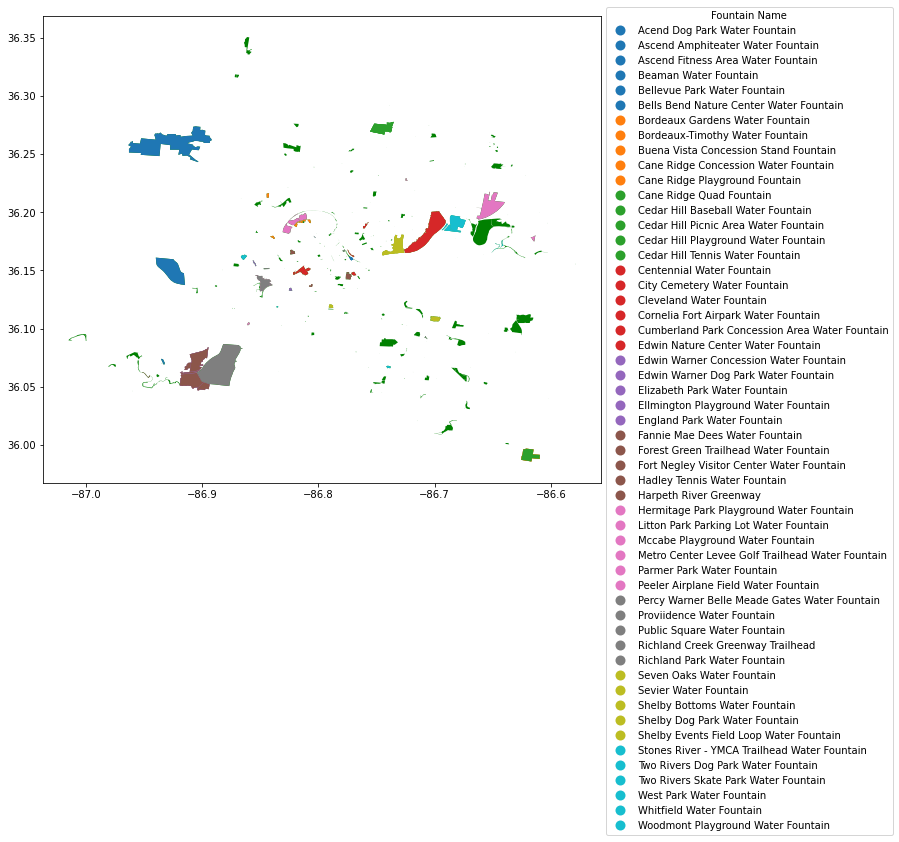

In [37]:
leg_kwds = {'title': "Fountain Name", 'loc': 'upper left',
          'bbox_to_anchor': (1, 1.03), 'ncol': 1}

ax = parks.plot(figsize = (10, 10), color = 'green')
loc_waterfountains_by_park.plot( ax = ax, column = 'fountain_name',
                    legend = True, legend_kwds = leg_kwds) ;
plt.show();



In [15]:
#polygon37207 = zipcodes.loc[zipcodes['zip'] == '37207']
#polygon37207.shape

In [16]:
#ax = polygonRiverfrontpark.plot(figsize = (8, 10), color = 'lightgreen')
#fountains.plot( ax = ax, column = 'route');
#plt.show();

In [17]:
parks.geometry.centroid

0      POINT (-86.95820 36.07700)
1      POINT (-86.93816 36.05943)
2      POINT (-86.93354 36.07160)
3      POINT (-86.92646 36.15017)
4      POINT (-86.92705 36.25907)
                  ...            
282    POINT (-86.62439 36.16174)
283    POINT (-86.60553 36.16567)
284    POINT (-86.64075 36.17175)
285    POINT (-86.82833 36.24953)
286    POINT (-86.71056 36.04204)
Length: 287, dtype: geometry

In [18]:
center = parks.geometry.centroid[42]
print(center)

# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

POINT (-86.78919068391862 36.11916886739873)
[36.119168867398734, -86.78919068391862]


In [19]:
#create our map of Nashville and show it
map_parks = folium.Map(location =  area_center, zoom_start = 12)
map_parks

In [20]:
for row_index, row_values in loc_waterfountains_by_park.iterrows():
    print('index is', row_index)
    print('values are:')
    print(' ')
    print(row_values)
    print('------------------------- ')

index is 2
values are:
 
name                                                 Bellevue Park
lon_left                                              -86.93354496
lat_left                                               36.07159731
geometry         (POLYGON ((-86.93207208588274 36.0695436596392...
index_right                                                     47
the_geom              POINT (-86.93480988838863 36.07298516423679)
lat_right                                                 -86.9348
fountain_name                         Bellevue Park Water Fountain
lon_right                                                   36.073
Name: 2, dtype: object
------------------------- 
index is 3
values are:
 
name                                               Bells Bend Park
lon_left                                              -86.92646294
lat_left                                               36.15016925
geometry         (POLYGON ((-86.93987469300984 36.1609279508778...
index_right                  

name                                                       England
lon_left                                               -86.8550499
lat_left                                               36.15637551
geometry         (POLYGON ((-86.85370436905774 36.1536972810986...
index_right                                                     17
the_geom             POINT (-86.85492120653595 36.156572160443005)
lat_right                                                 -86.8549
fountain_name                          England Park Water Fountain
lon_right                                                  36.1566
Name: 18, dtype: object
------------------------- 
index is 19
values are:
 
name                                                   Hadley Park
lon_left                                              -86.82242669
lat_left                                               36.16553119
geometry         (POLYGON ((-86.82258808033603 36.1677402755796...
index_right                                         

name                                             E. N. Peeler Park
lon_left                                              -86.65257284
lat_left                                               36.20519111
geometry         (POLYGON ((-86.65280908219648 36.2155496928512...
index_right                                                     39
the_geom              POINT (-86.65680453473183 36.20180578264442)
lat_right                                                 -86.6568
fountain_name                 Peeler Airplane Field Water Fountain
lon_right                                                  36.2018
Name: 96, dtype: object
------------------------- 
index is 102
values are:
 
name                                               Cane Ridge Park
lon_left                                              -86.61878194
lat_left                                               35.99102795
geometry         (POLYGON ((-86.62005096880189 35.9965384214261...
index_right                                        

In [50]:
map_parks = folium.Map(location =  area_center, zoom_start = 12)
map_parks
folium.GeoJson(parks.geometry).add_to(map_parks)
for row_index, row_values in loc_waterfountains_by_park.iterrows():
    loc = [row_values['lat_left'], row_values['lon_left']]
    pop = str(row_values['fountain_name']) 
    marker = folium.Marker(
        location = loc, 
        popup = pop) 
    
    marker.add_to(map_parks)
map_parks.save('../maps/foliumwaterstations.html')

#display our map
map_parks

In [51]:
cluster_map_parks = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_parks)

folium.GeoJson(parks).add_to(cluster_map_parks)

# inside the loop add each markwe to the cluster
for row_index, row_values in loc_waterfountains_by_park.iterrows():
    loc = [row_values['lat_left'], row_values['lon_left']]
    pop = str(row_values['fountain_name'])
    marker = folium.Marker(
        location = loc, 
        popup = pop) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_parks.save('../maps/clusterwaterstations.html')

cluster_map_parks  